# Communicating findings from the exploration of the prosper loan dataset

by Olamide Olowoniyi

# Investigation Overview

The main purpose of this explanatory presentation is to establish the factors or variables responsible for influencing a loan's annual percentage interest and show the relationship that exists among them.

# Dataset Overview

The prosper loan data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and so many others.

In [1]:
#import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
    
#suppress warnings from final output\n",
import warnings
warnings.simplefilter("ignore")

In [2]:
#loading in the dataset
loan =  pd.read_csv('prosperLoanData.csv')
loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
#data wrangling
#keeping only the columns that are of interest  
cols = ['Term', 'ListingCreationDate', 'LoanStatus', 'ProsperScore', 'MonthlyLoanPayment', 'BorrowerState', 'LoanOriginalAmount', 'ListingCategory (numeric)', 'BorrowerRate', 'BorrowerAPR', 'StatedMonthlyIncome', 'CreditScoreRangeLower', 
        'CreditScoreRangeUpper', 'Occupation', 'AvailableBankcardCredit', 'EmploymentStatus', 'RevolvingCreditBalance', 'DebtToIncomeRatio']
loan_target = loan[cols]

In [4]:
loan_target.head()

,Term,ListingCreationDate,LoanStatus,ProsperScore,MonthlyLoanPayment,BorrowerState,LoanOriginalAmount,ListingCategory (numeric),BorrowerRate,BorrowerAPR,StatedMonthlyIncome,CreditScoreRangeLower,CreditScoreRangeUpper,Occupation,AvailableBankcardCredit,EmploymentStatus,RevolvingCreditBalance,DebtToIncomeRatio
0,36,2007-08-26 19:09:29.263000000,Completed,NaN,330.43,CO,9425,0,0.1580,0.16516,3083.333333,640.0,659.0,Other,1500.0,Self-employed,0.0,0.17
1,36,2014-02-27 08:28:07.900000000,Current,7.0,318.93,CO,10000,2,0.0920,0.12016,6125.000000,680.0,699.0,Professional,10266.0,Employed,3989.0,0.18
2,36,2007-01-05 15:00:47.090000000,Completed,NaN,123.32,GA,3001,0,0.2750,0.28269,2083.333333,480.0,499.0,Other,NaN,Not available,NaN,0.06
3,36,2012-10-22 11:02:35.010000000,Current,9.0,321.45,GA,10000,16,0.0974,0.12528,2875.000000,800.0,819.0,Skilled Labor,30754.0,Employed,1444.0,0.15
4,36,2013-09-14 18:38:39.097000000,Current,4.0,563.97,MN,15000,2,0.2085,0.24614,9583.333333,680.0,699.0,Executive,695.0,Employed,6193.0,0.26


My major question through out this analysis centred around the BorrowerAPR. So I will start by showing the distribution of the APR

# Distribution of BorrowerAPR

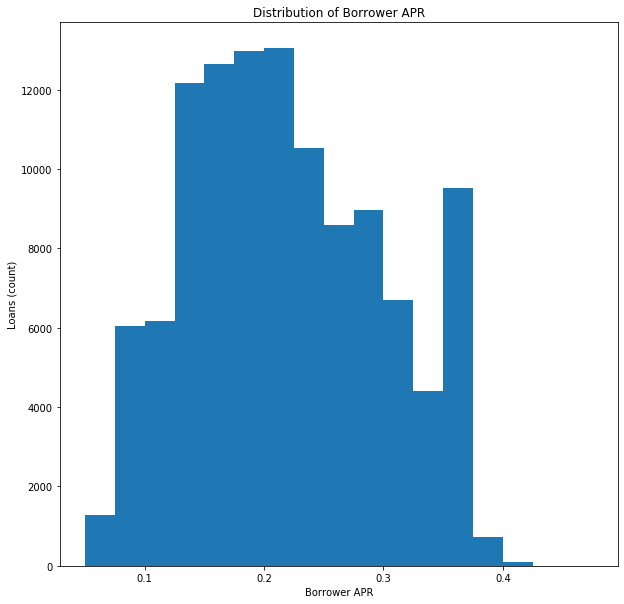

In [5]:
#plotting histogram
bins = np.arange(0.05, 0.50, 0.025)
plt.figure(figsize=(10, 10))
plt.hist(data = loan_target, x = 'BorrowerAPR', bins=bins)
plt.title('Distribution of Borrower APR')
plt.xlabel('Borrower APR')
plt.ylabel('Loans (count)');

The BorrowerAPR data appears to be normally distributed with some large spikes around the extremeties. The average borrower pays about 20 to 21% interest on prosper loans.

# Variables influencing loan interest rate

The two factors identified from the exploration analysis to influence the loan interest rates are:

1. Credit Score: This has a strong negative correlation with the BorrowerAPR with rates reducing as the score increases. 

2. Prosper Score: Similarly, this also has strong negative correlation with the BorrowerAPR with rates reducing as the score increases.

# Relationship between Borrower APR and Properscore

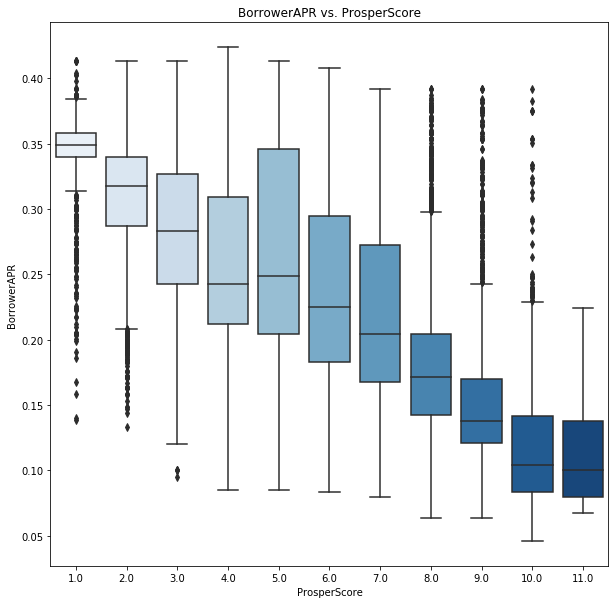

In [6]:
sb.boxplot(data = loan_target, x = 'ProsperScore', y = 'BorrowerAPR', palette='Blues')
plt.gcf().set_size_inches(10, 10)
plt.title('BorrowerAPR vs. ProsperScore')
plt.xlabel('ProsperScore')
plt.ylabel('BorrowerAPR');

Very clearly, we can see that prosper score is a strong determining factor for the interest rate. As the prosper score increases, the interest rate decreases

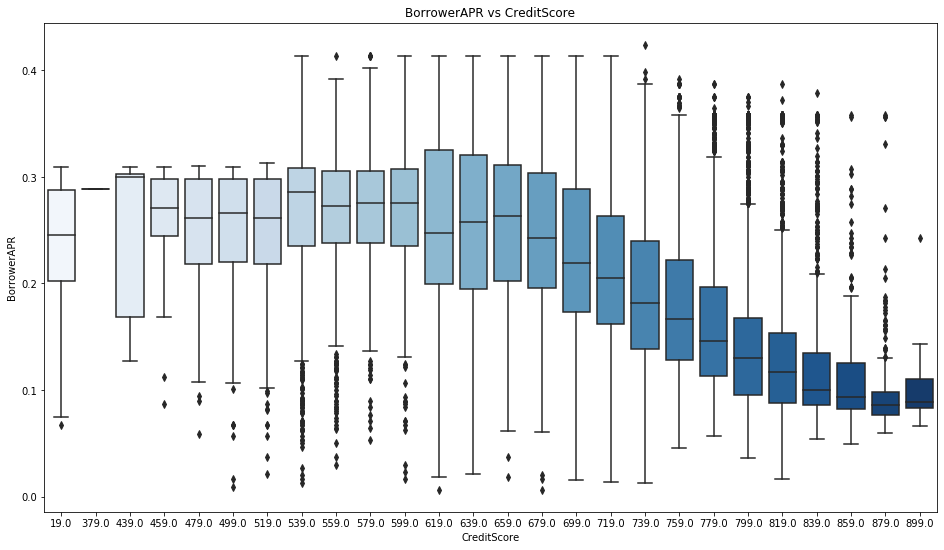

In [7]:
sb.boxplot(data = loan_target, x = 'CreditScoreRangeUpper', y = 'BorrowerAPR', palette="Blues")
plt.gcf().set_size_inches(16, 9)
plt.title('BorrowerAPR vs CreditScore');
plt.xlabel('CreditScore')
plt.ylabel('BorrowerAPR');

We can see a negative correlation between the credit score and APR. As is obtainable in the prosper score vs borrower APR, we can also see that as the borrower's credit score increases, the APR decreases. This relationship is expected because a borrower with a good credit score is deemed loan worthy. 

# Investigating the relatationship among the three key variables

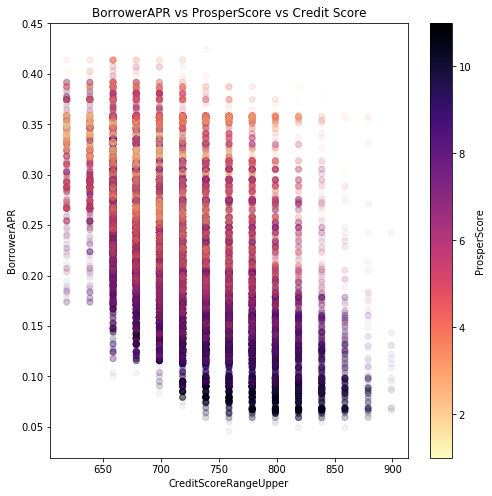

In [8]:
#plotting a scatterplot to investigate relationship among CreditScore,BorrowerAPR and ProsperScore
plt.figure(figsize = [8,8])
plt.scatter(data=loan_target, x='CreditScoreRangeUpper', y='BorrowerAPR', c='ProsperScore', cmap='magma_r', alpha=0.05);
cbar = plt.colorbar(label='ProsperScore')
cbar.solids.set(alpha=1)
plt.title('BorrowerAPR vs ProsperScore vs Credit Score');
plt.xlabel('CreditScoreRangeUpper')
plt.ylabel('BorrowerAPR');

This scatterplot shows the borrowers prosper score >10 have the best APRs-which are typically less that 10% (0.1). Here we can see that the best APRs (Below 0.1) are mostly borrowers with a Prosperscore above 10 and above 700. However, there are some borrowers with credit scores below 700, that have great prosper scores, but very few.

In [ ]:
!jupyter nbconvert slide_deck.ipynb --to slides --post serve --template output_toggle.tpl